# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [20]:
import pandas as pd
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv'
f = urllib.request.urlopen(url)
header_line = ""

for line in f:
    decoded_line = line.decode("utf-8")
    if "# Fields:" in decoded_line:
        header_line = decoded_line.strip()
        break

headers = header_line.split(":")[1].strip().split(',')
headers = [x.strip() for x in headers]

headers = [header for header in headers if header]

df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv',
                 skiprows=7,
                 names=headers,
                 na_values=['-'],
                 thousands=',',
                 index_col=False
                )

df = df.drop(columns=['query acc.ver'])

df = df.set_index('subject acc.ver')

df = df.rename(columns={'publications"': 'publications'})

df.info()

print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, NP_904328.1 to AGS12808.1
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   % identity        100 non-null    float64
 1   alignment length  100 non-null    int64  
 2   mismatches        100 non-null    int64  
 3   gap opens         100 non-null    int64  
 4   q. start          100 non-null    int64  
 5   q. end            100 non-null    int64  
 6   s. start          100 non-null    int64  
 7   s. end            100 non-null    int64  
 8   evalue            100 non-null    int64  
 9   bit score         100 non-null    int64  
 10  % positives       100 non-null    float64
 11  bonds             100 non-null    int64  
 12  publications      97 non-null     float64
dtypes: float64(3), int64(10)
memory usage: 10.9+ KB
                 % identity  alignment length  mismatches  gap opens  \
subject acc.ver                                      

<ipython-input-20-423a73d01eb6>:22: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv',


### Question 2
What is the average number of publications?

In [21]:
### Your code here . . .
df.publications.mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [22]:
### Your code here . . .
list(df[df.bonds > 15000].index)

['AGK29621.1',
 'AHG32084.1',
 '6G2J_H',
 'YP_002791042.1',
 'AGK29634.1',
 '0806162F',
 'YP_009112408.1',
 'YP_001876469.1',
 'YP_009092269.1',
 'AHG32149.1',
 'YP_009092074.1',
 'YP_009450474.1',
 'YP_004123270.1',
 'YP_009092073.1',
 'AHZ60901.1',
 'YP_004123350.1',
 'YP_009453754.1',
 'ADD46492.1',
 'YP_007025968.1',
 'YP_009453806.1',
 'YP_007024956.1',
 'ASM92364.1',
 'YP_006073044.1',
 'ASM92494.1',
 'ADG95699.1',
 'YP_004891275.1',
 'YP_009166014.1',
 'YP_009538416.1',
 'YP_009414182.1',
 'YP_009178854.1',
 'YP_009414415.1',
 'YP_009353908.1',
 'YP_009093743.1',
 'ABX45285.1',
 'YP_009414156.1',
 'YP_009414363.1']

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

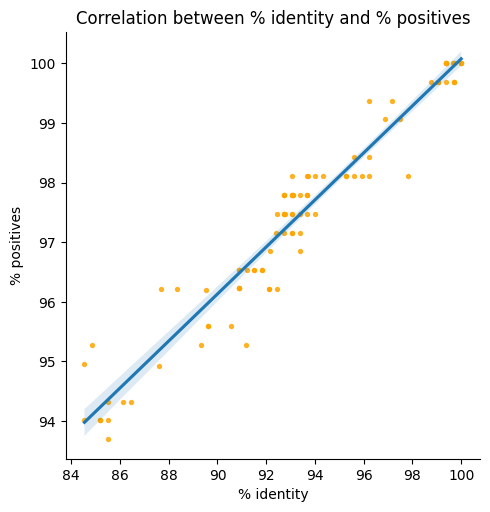

In [23]:
### Your code here . . .
# Plot % identity against % positives
sns.lmplot(
    data=df,
    x='% identity',
    y='% positives',
    scatter_kws={'s': 8, 'color': 'orange'}
)

plt.title('Correlation between % identity and % positives');

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [24]:
### Your code here . . .
protein_df = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv',
                         index_col=0
                        ).rename(columns={'Source': 'Protein source'})


merged_df = df.merge(protein_df, left_index=True, right_on='Protein', how='left').reset_index(drop=True)

merged_df


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein,Protein source
0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,NP_904328.1,RefSeq
1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,AGK29621.1,NaN
2,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,YP_220563.1,GenPept
3,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,ACM24502.1,NaN
4,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,AHG32084.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,ABX45285.1,NaN
96,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,ASP44815.1,NaN
97,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,YP_009414156.1,GenPept
98,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5.0,YP_009414363.1,GenPept
